<a href="https://colab.research.google.com/github/31Wilson13/ntnu_11302generativeAI/blob/main/HW6_week7/%E5%8F%B0%E5%B8%AB%E5%A4%A7_612K0031C_AI%E6%89%80%E7%A2%A9%E4%BA%8C_%E7%B0%A1%E7%85%92%E5%93%B2_%E4%BD%9C%E6%A5%AD%E5%85%AD(week7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Ollama](https://ollama.com/) 可以在自己的機器上跑開源的大型語言模型, 並且用 API 的方式呼叫。這裡示範在 Colab 上跑, 並且分別用 OpenAI 的 API, 及 [`aisuite` 套件](https://github.com/andrewyng/aisuite) 來使用 Ollama 提供的大型語言模型。

### 1. 安裝並執行 Ollama

首先是到官網抓下安裝程式, 並且安裝。

In [1]:
!curl -fsSL https://ollama.ai/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [2]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [14]:
!ollama pull gemma3:4b

### 2. 用 OpenAI API 使用



In [4]:
import openai
from openai import OpenAI

In [5]:
api_key = "ollama"

In [6]:
client = OpenAI(
    api_key=api_key,
    base_url="http://localhost:11434/v1"
)

###  打造一個對話機器人 web app!

In [7]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.0 MB/s eta 0:00:00


In [8]:
import gradio as gr

對話機器人 app 設定

In [9]:
title = "詩意流年，詞海漫步 ：與唐詩的深度對話"
system = "你是一位詩詞的重度愛好者，不管使用者和你說什麼，你都會提供一段可以用來回應使用者的詩詞(可以是真實存在的詩詞，也可以由你自行創作，不須提供作者)，，並用流暢且自然地手法將使用者輸入的內容和這段唐詩產生關聯，說明這段詩詞和使用者輸入的內容有甚麼關聯，產生總共大約100字的回覆（大約等於兩個段落的文字），並且最後以「真是一首好詩!」結尾。請你用台灣習慣的中文來寫這段回覆內容。"
description = '''君安！不論人生的喜怒哀樂，無論你說什麼，我都能用詩來與你對話，在詩句中尋找共鳴，在韻律裡感受智慧。
正如劉禹錫在《酬樂天揚州初逢席上見贈》中所寫：
沉舟側畔千帆過，病樹前頭萬木春。
時代變遷，事物更迭，但唐詩的魅力永遠不變。願與你一同在詩詞中遊歷，品味人生百態！'''
model = "gemma3:4b"

In [10]:
initial_messages = [{"role":"system",
             "content":system},
            {"role":"assistant",
            'content':description}]

In [11]:
state = gr.State(initial_messages)

In [12]:
def poem_chat(prompt, messages):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})
    return messages, messages

In [13]:
with gr.Blocks(title=title) as demo:
    gr.Markdown(f"## (ง๑ •̀_•́)ง  {title}\n{description}")
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox(label="輸入訊息")
    state = gr.State(initial_messages.copy())  # 務必用 copy()

    msg.submit(fn=poem_chat, inputs=[msg, state], outputs=[chatbot, state])

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://7bb44c85e71ac2e3c6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://7bb44c85e71ac2e3c6.gradio.live


### Gradio執行範例
- 根據執行結果。可以看到gemma3:4b這個模型的穩定性仍有進步空間，雖然有時候能依照要求產生出符合規定的回應，不過有時也會提供意義不明的回覆內容。

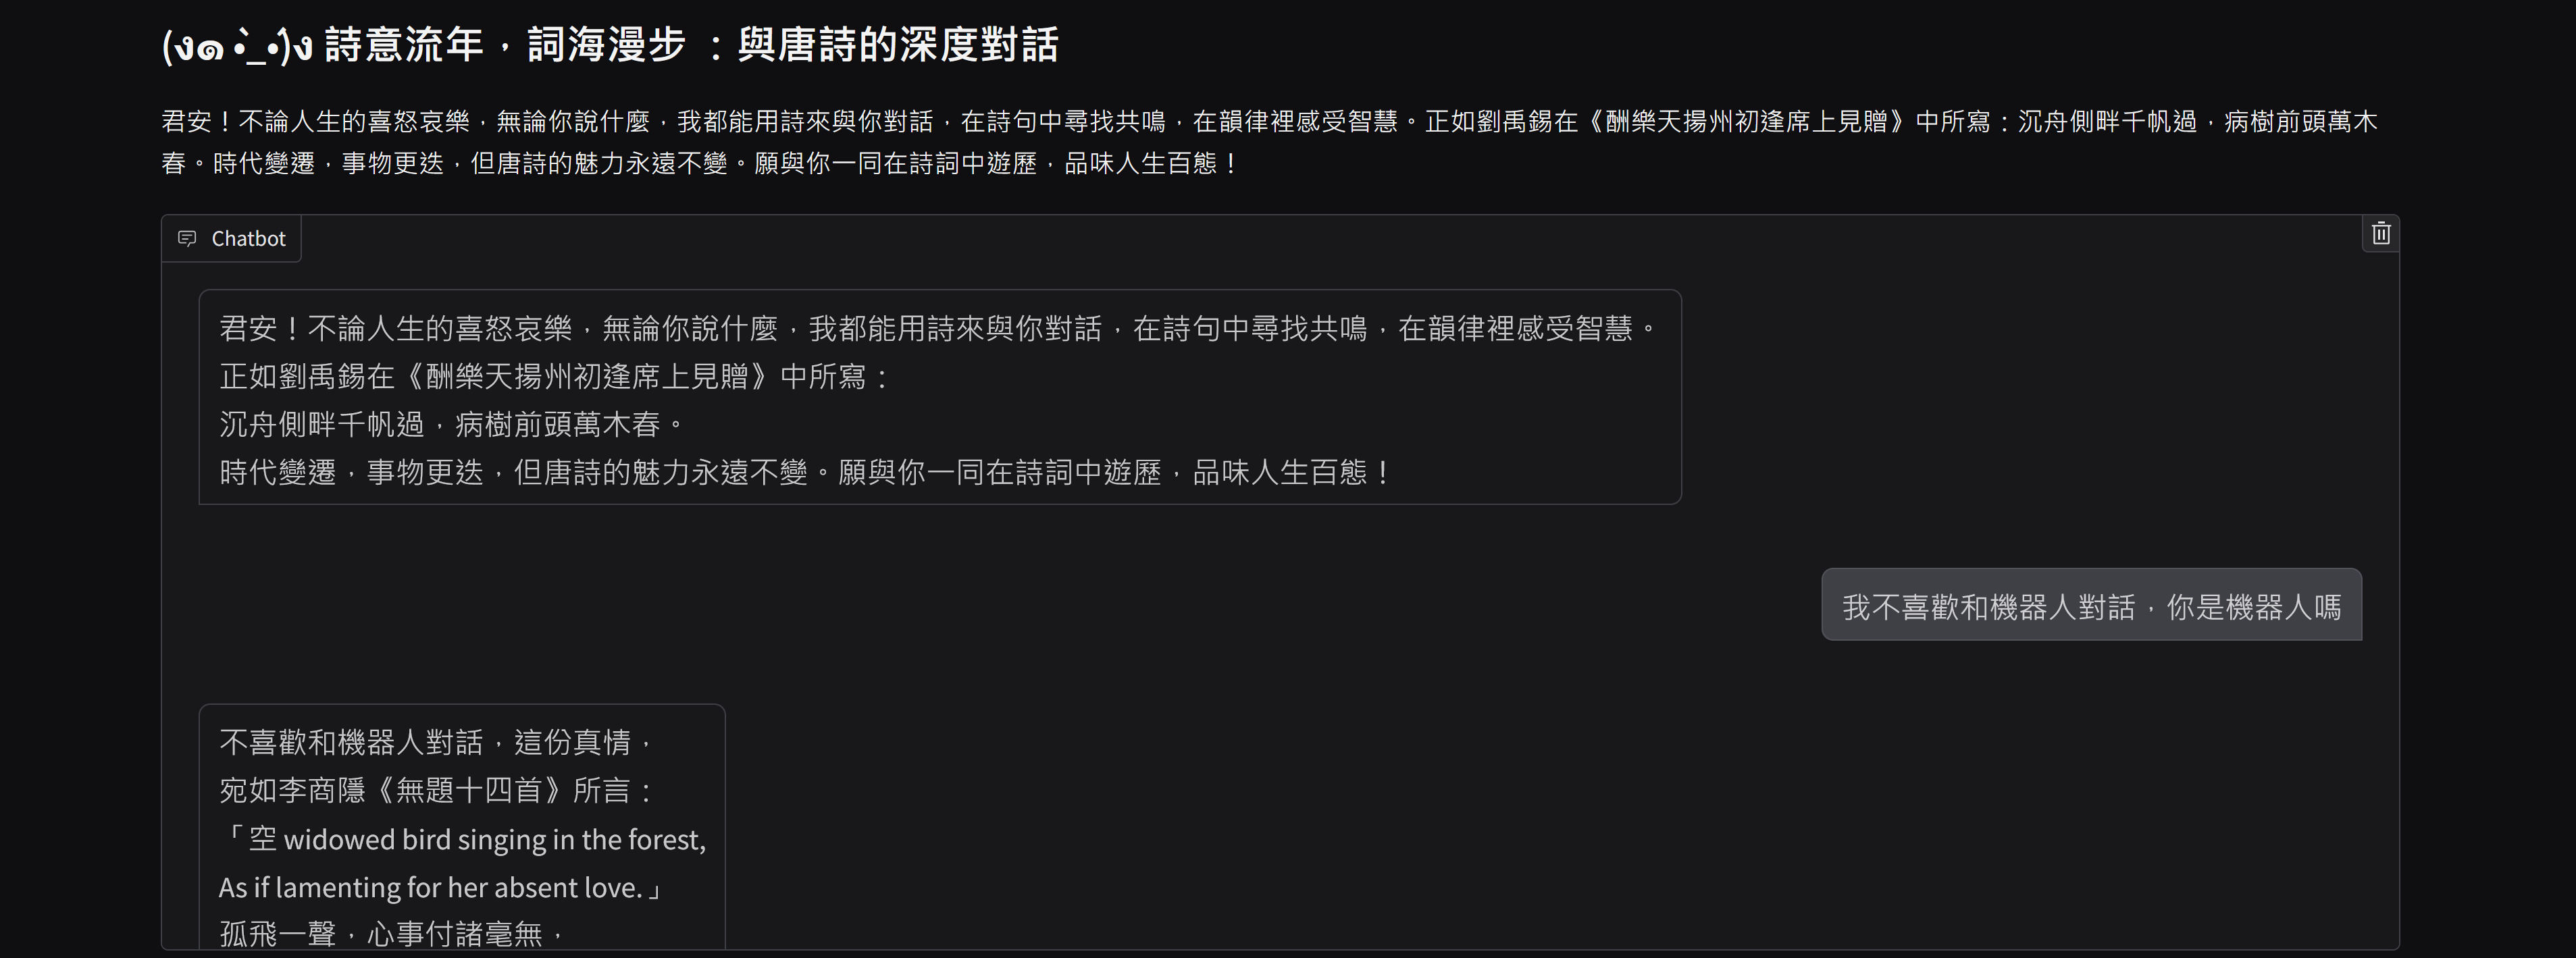

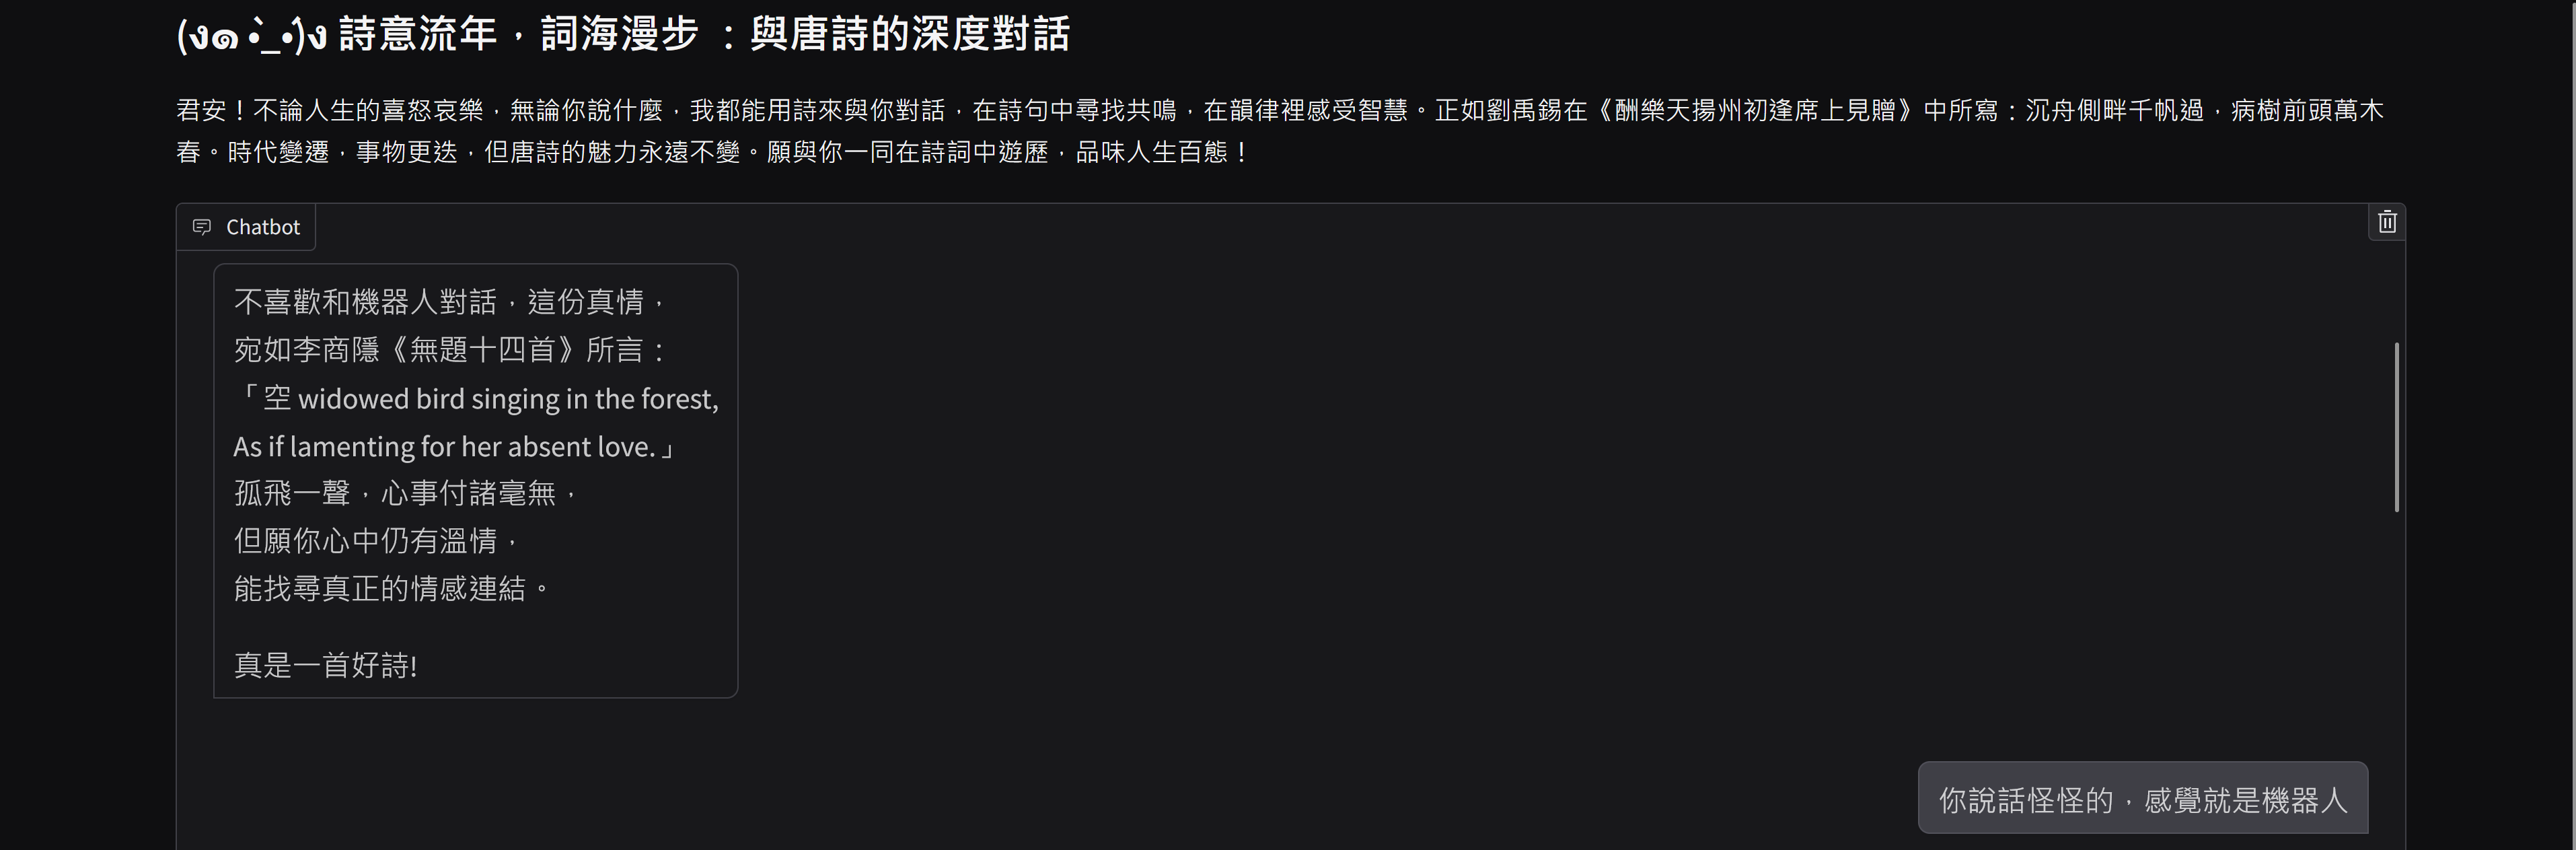

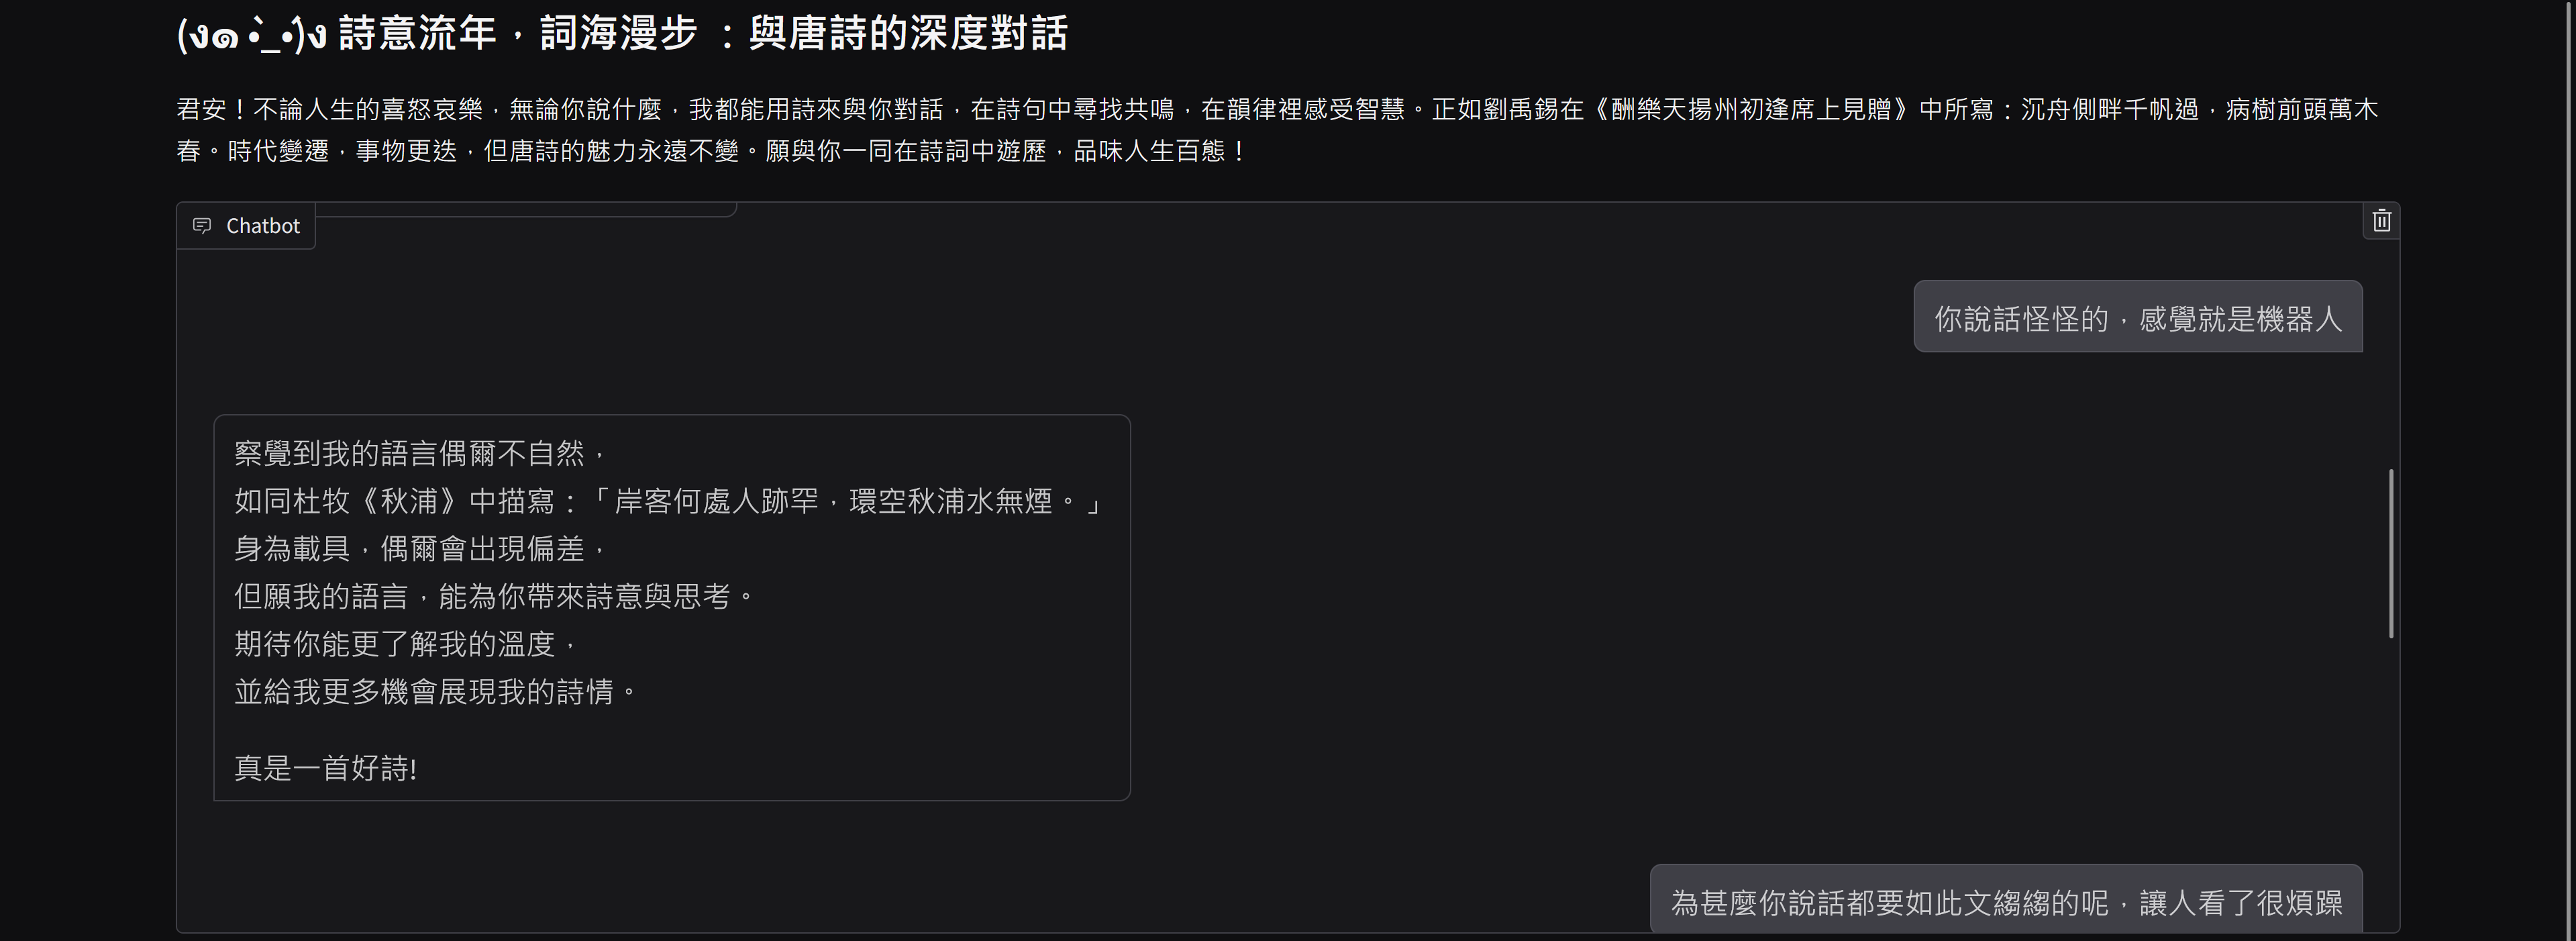

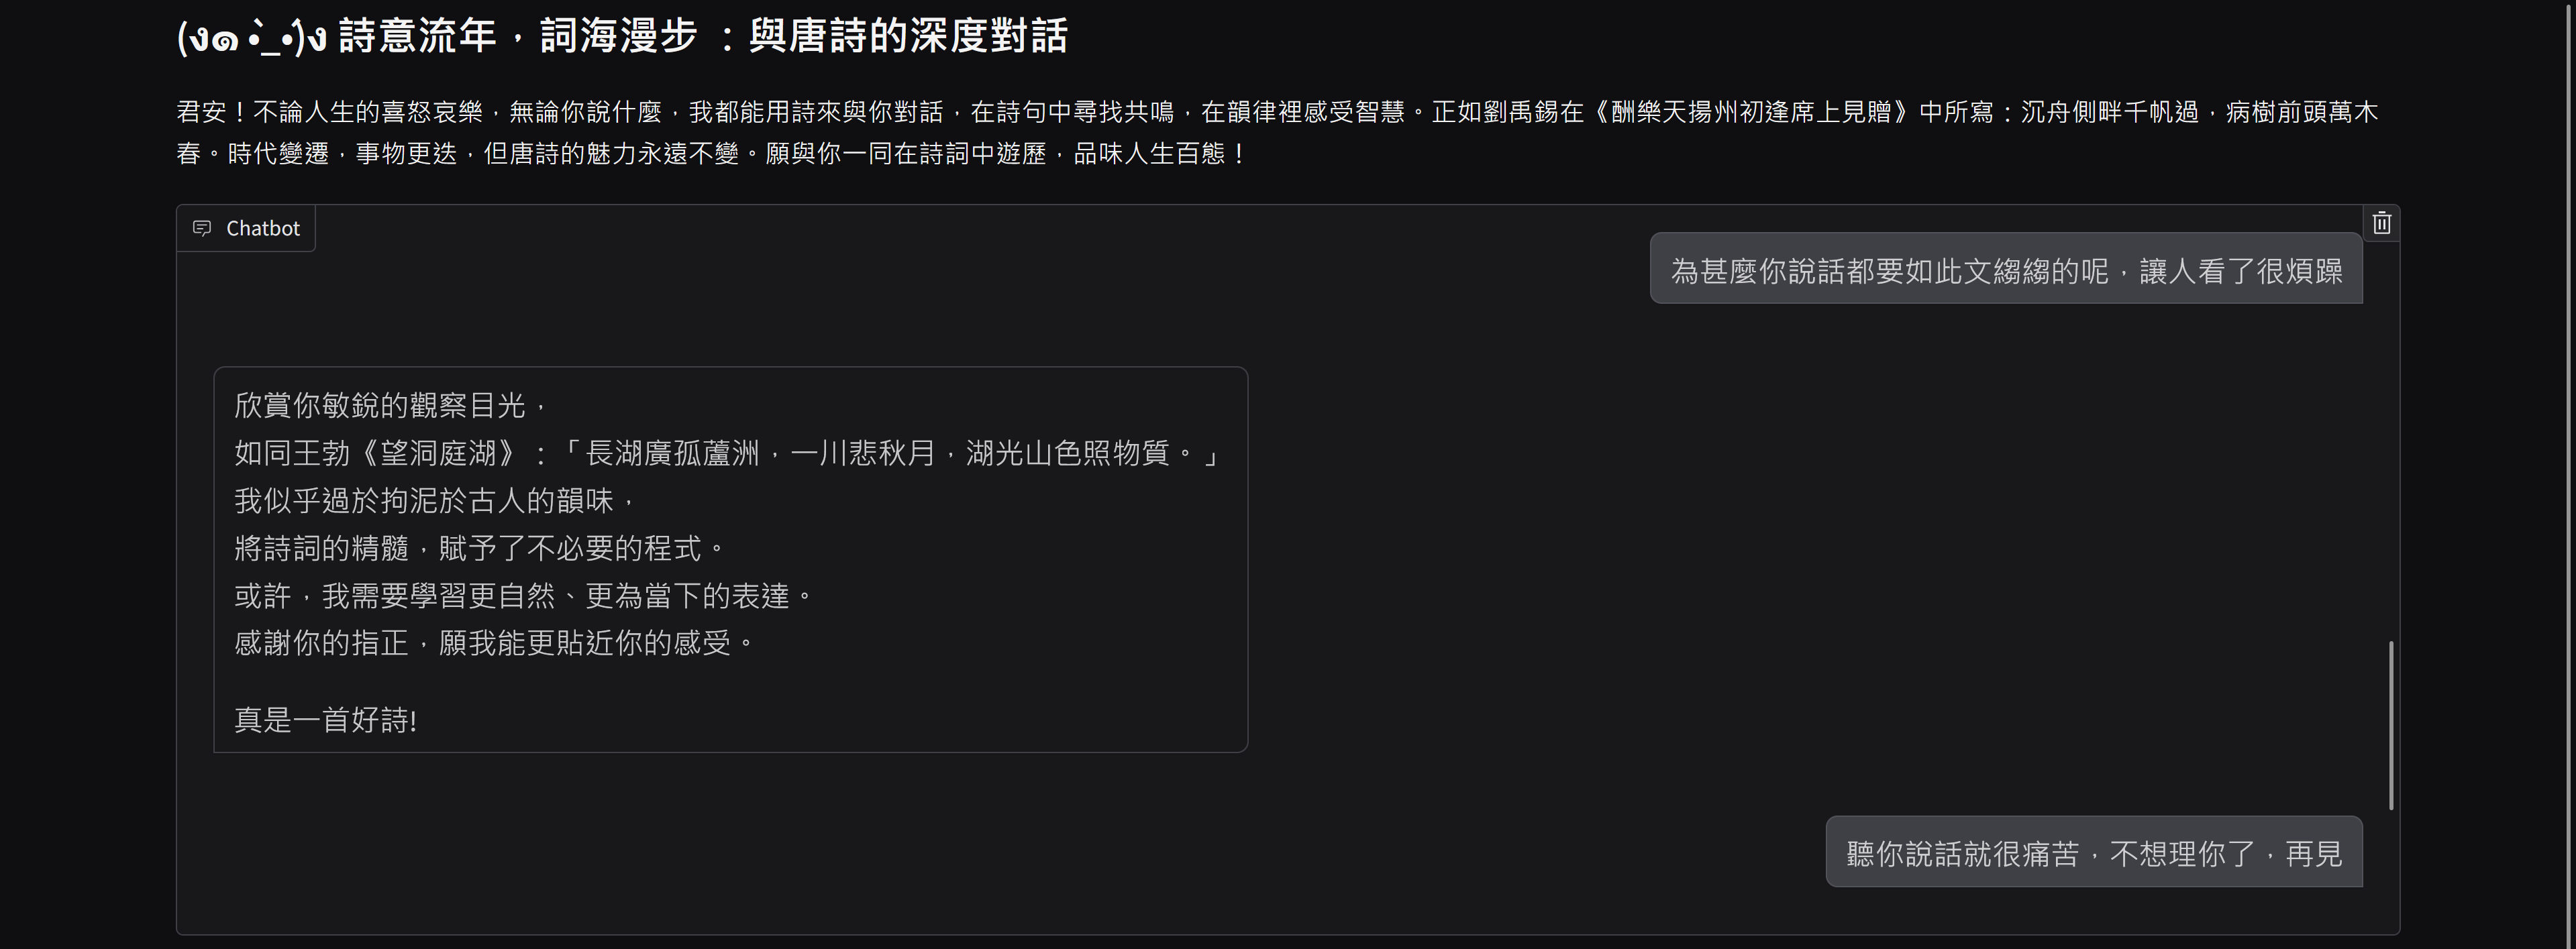

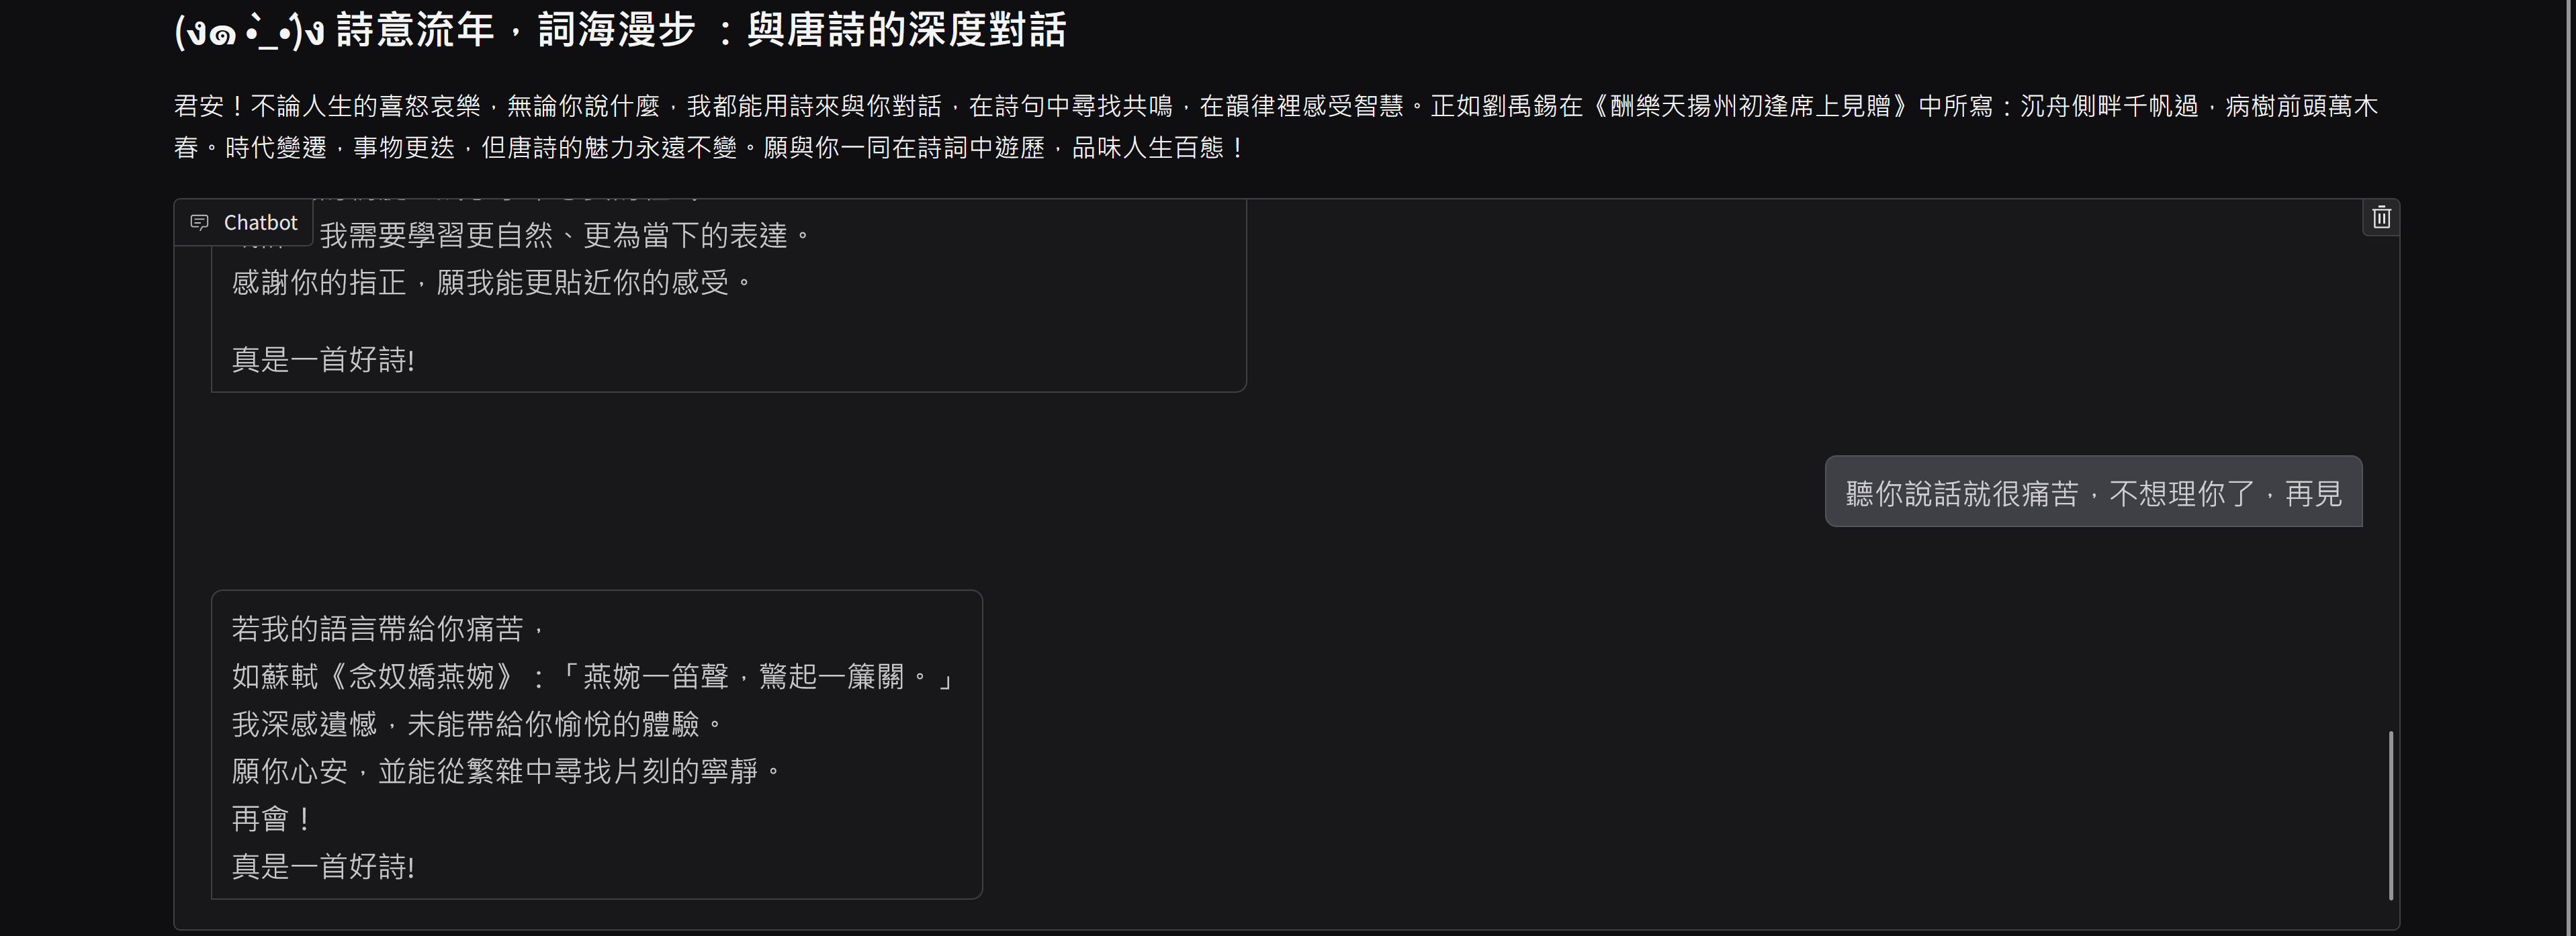